In [ ]:
# pip install lxml

In [5]:
import pandas as pd

url = 'https://twu.tennis-warehouse.com/learning_center/reporter2.php'
tables = pd.read_html(url)
df = tables[0]  # Usually the first table
# df.to_excel('tennis_string_data.xlsx', index=False)

/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extma

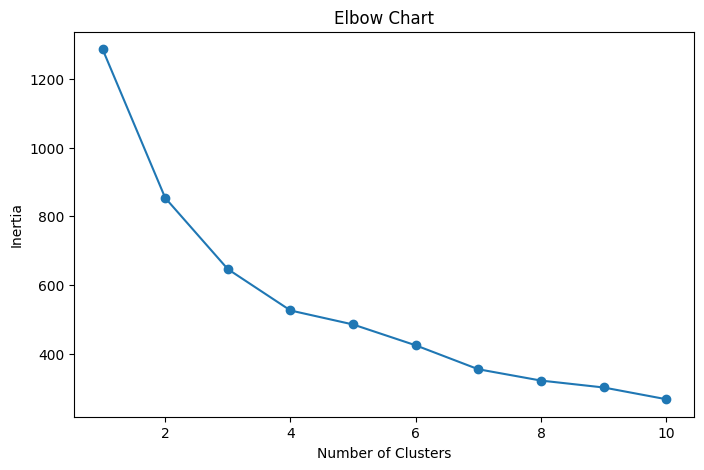

/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/joezhou/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/4085446762.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(scaled_data)
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/4085446762.py:36: SettingWithCopyWarning: 
A 

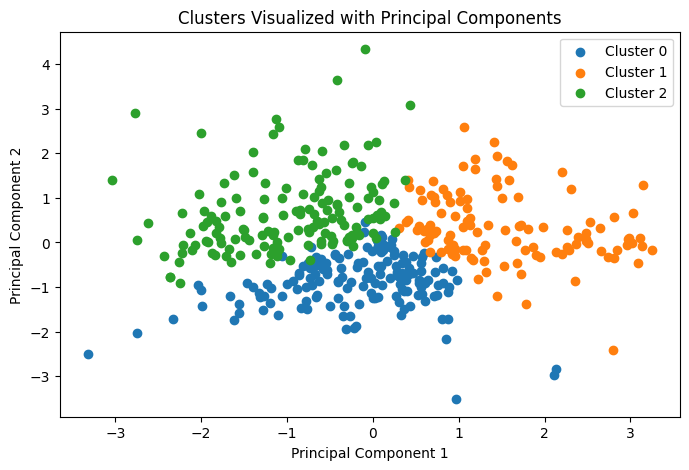

                               String  Cluster
0  Weiss Cannon Ultra Cable 17 (1.23)        2
1            Volkl V-Square 16 (1.30)        2
2      Weiss Cannon Blue Rock N Power        2
3          Babolat RPM Blast Rough 17        2
4  Tecnifibre Black Code 4S 17 (1.25)        2


In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Preprocessing: Standardize the data
features = ['Stiffness (lb/in)', 'Tension Loss (%)', 'Spin Potential']
df_cleaned = df.dropna(subset=features)  # Drop rows with NaN in selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[features])

# Elbow chart to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-means clustering with the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_data)

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
df_cleaned['PC1'] = principal_components[:, 0]
df_cleaned['PC2'] = principal_components[:, 1]

# Visualize the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('Clusters Visualized with Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Final dataframe with clusters
df_grouped = df_cleaned[['String', 'Cluster']]
print(df_grouped.head())

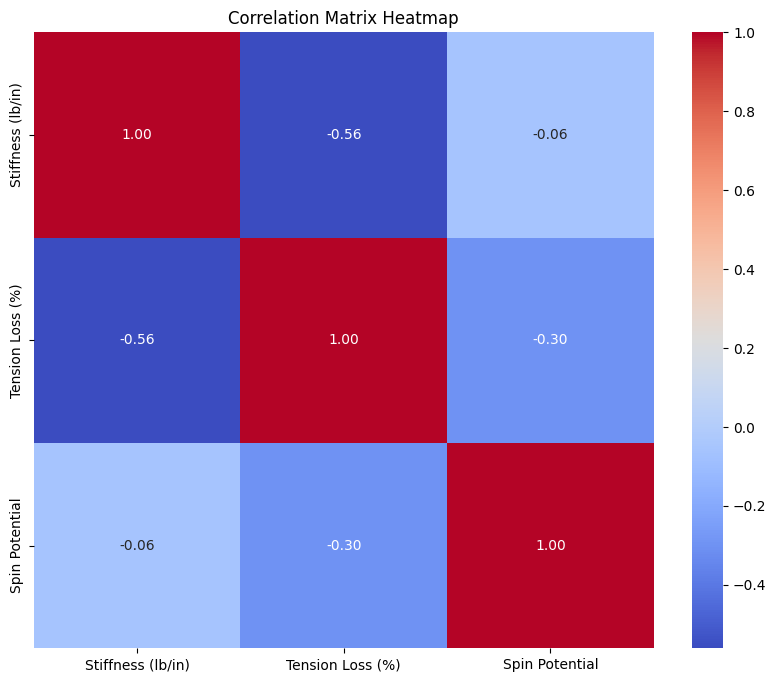

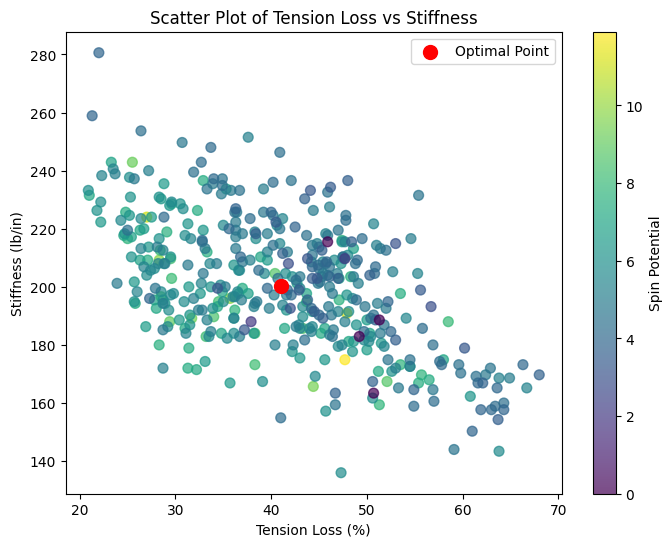

In [14]:
import seaborn as sns

# Calculate the correlation matrix for the relevant features
correlations = df_cleaned[['Stiffness (lb/in)', 'Tension Loss (%)', 'Spin Potential']].corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Scatter plot for the optimal point
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Tension Loss (%)'], df_cleaned['Stiffness (lb/in)'], c=df_cleaned['Spin Potential'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Spin Potential')

# Define an example optimal point (replace with actual logic if needed)
optimal_point = {'Tension Loss (%)': df_cleaned['Tension Loss (%)'].mean(), 'Stiffness (lb/in)': df_cleaned['Stiffness (lb/in)'].mean()}

plt.scatter(optimal_point['Tension Loss (%)'], optimal_point['Stiffness (lb/in)'], color='red', s=100, label='Optimal Point')
plt.title("Scatter Plot of Tension Loss vs Stiffness")
plt.xlabel("Tension Loss (%)")
plt.ylabel("Stiffness (lb/in)")
plt.legend()
plt.show()

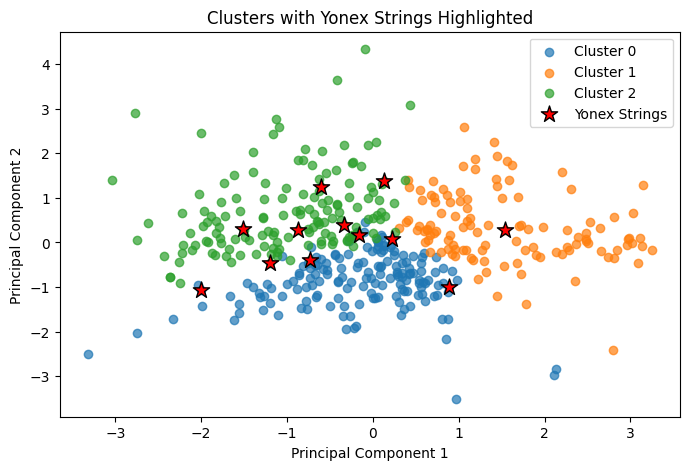

In [17]:
# Filter for Yonex strings
yonex_data = df_cleaned[df_cleaned['String'].str.contains('Yonex', case=False)]

# Plot the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

# Highlight Yonex strings with a distinct marker (e.g., star)
plt.scatter(yonex_data['PC1'], yonex_data['PC2'], color='red', marker='*', s=150, label='Yonex Strings', edgecolor='black')

plt.title('Clusters with Yonex Strings Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [18]:
# Create a summary table for Yonex strings
yonex_summary = yonex_data[['String', 'Cluster']]
print(yonex_summary)

                                   String  Cluster
28       Yonex Poly Tour Drive 16L (1.25)        2
49          Yonex Polytour Rev 16L (1.25)        2
95        Yonex Poly Tour Spin 16L (1.25)        2
136       Yonex Poly Tour Fire 16L (1.25)        2
158         Yonex Poly Tour HS 16L (1.25)        2
204             Yonex Poly Tour Tough 16L        0
215         Yonex Poly Tour Pro 17 (1.20)        2
250          Yonex Poly Tour HS 16 (1.30)        2
270           Yonex Poly Tour Spin G 1.25        0
305     Yonex Poly Tour Strike 16L (1.25)        2
344               Yonex Poly Tour Air 16L        1
408  Yonex Poly Tour Pro Yellow 16 (1.30)        0


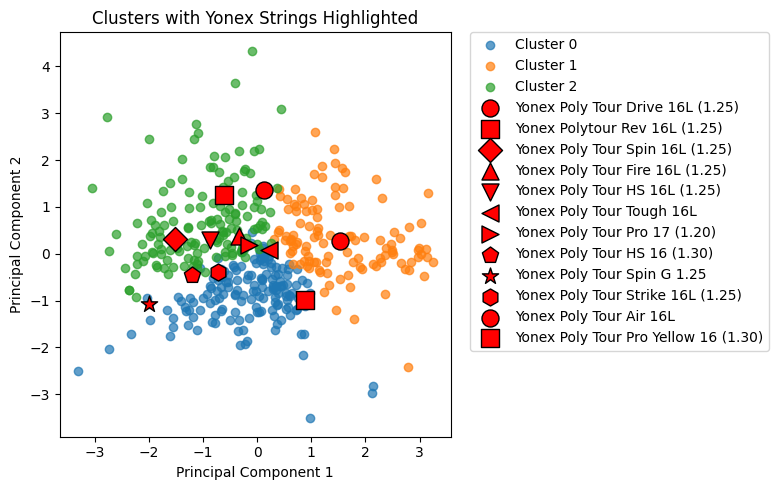

In [20]:
# Filter for Yonex strings
yonex_data = df_cleaned[df_cleaned['String'].str.contains('Yonex', case=False)]

# Define a dictionary of markers for each Yonex string
unique_strings = yonex_data['String'].unique()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']  # Add more markers if needed
marker_map = {string: markers[i % len(markers)] for i, string in enumerate(unique_strings)}

# Plot the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_data = df_cleaned[df_cleaned['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

# Highlight Yonex strings with unique markers
for _, row in yonex_data.iterrows():
    plt.scatter(row['PC1'], row['PC2'], color='red', marker=marker_map[row['String']], s=150, edgecolor='black', label=row['String'])

plt.title('Clusters with Yonex Strings Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Move the legend outside the chart area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


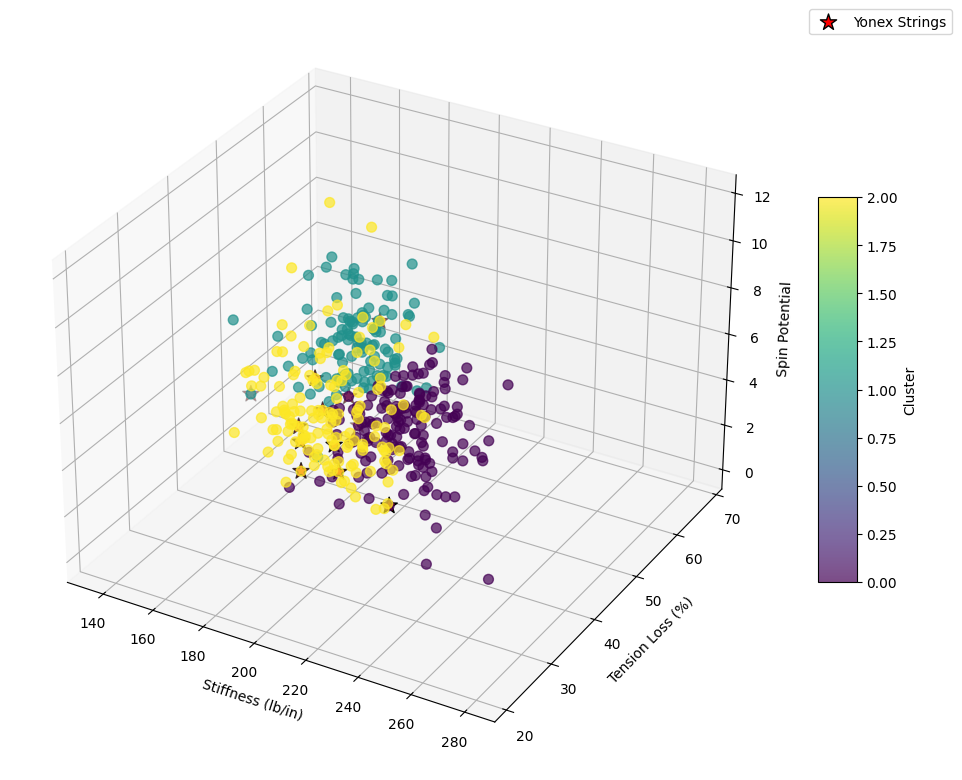

In [21]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot all data points
scatter = ax.scatter(
    df_cleaned['Stiffness (lb/in)'],
    df_cleaned['Tension Loss (%)'],
    df_cleaned['Spin Potential'],
    c=df_cleaned['Cluster'],  # Color by cluster
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Highlight Yonex strings with a distinct marker
yonex_scatter = ax.scatter(
    yonex_data['Stiffness (lb/in)'],
    yonex_data['Tension Loss (%)'],
    yonex_data['Spin Potential'],
    color='red',
    marker='*',
    s=150,
    edgecolor='black',
    label='Yonex Strings'
)

# Set axis labels
ax.set_xlabel('Stiffness (lb/in)')
ax.set_ylabel('Tension Loss (%)')
ax.set_zlabel('Spin Potential')

# Add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add a color bar for clusters
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cluster')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Normalize the values for each feature to bring them to the same scale
df_cleaned['Tension Loss (Normalized)'] = df_cleaned['Tension Loss (%)'] / df_cleaned['Tension Loss (%)'].max()
df_cleaned['Spin Potential (Normalized)'] = df_cleaned['Spin Potential'] / df_cleaned['Spin Potential'].max()
df_cleaned['Stiffness (Normalized)'] = df_cleaned['Stiffness (lb/in)'] / df_cleaned['Stiffness (lb/in)'].max()

# Calculate a composite score (lower tension loss and stiffness are better, higher spin potential is better)
df_cleaned['Composite Score'] = (
    (1 - df_cleaned['Tension Loss (Normalized)']) +  # Lower is better
    df_cleaned['Spin Potential (Normalized)'] +      # Higher is better
    (1 - df_cleaned['Stiffness (Normalized)'])       # Lower is better
)

# Find the row with the highest composite score
best_row = df_cleaned.loc[df_cleaned['Composite Score'].idxmax()]

# Print the best row
print("Best row based on the combination of least tension loss, maximum spin potential, and least stiffness:")
print(best_row)

Best row based on the combination of least tension loss, maximum spin potential, and least stiffness:
String                         Weiss Cannon Blue Rock N Power
Ref. Ten. (lbs)                                            51
Swing Speed                                              Fast
Material                                            Polyester
Stiffness (lb/in)                                       224.0
Tension Loss (%)                                         27.0
Spin Potential                                           11.1
Cluster                                                     2
PC1                                                 -2.773419
PC2                                                  2.912068
Tension Loss (Normalized)                            0.397059
Spin Potential (Normalized)                          0.932773
Stiffness (Normalized)                               0.798289
Composite Score                                      1.737425
Name: 2, dtype: object


/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/1306335701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tension Loss (Normalized)'] = df_cleaned['Tension Loss (%)'] / df_cleaned['Tension Loss (%)'].max()
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/1306335701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Spin Potential (Normalized)'] = df_cleaned['Spin Potential'] / df_cleaned['Spin Potential'].max()
/var/folders/19/_tmb5pd5375b9vfjh2

In [24]:
# Yonnex strings only

# Filter for Yonex strings
yonex_data = df_cleaned[df_cleaned['String'].str.contains('Yonex', case=False)]

# Normalize the values for each feature to bring them to the same scale
yonex_data['Tension Loss (Normalized)'] = yonex_data['Tension Loss (%)'] / yonex_data['Tension Loss (%)'].max()
yonex_data['Spin Potential (Normalized)'] = yonex_data['Spin Potential'] / yonex_data['Spin Potential'].max()
yonex_data['Stiffness (Normalized)'] = yonex_data['Stiffness (lb/in)'] / yonex_data['Stiffness (lb/in)'].max()

# Calculate a composite score (lower tension loss and stiffness are better, higher spin potential is better)
yonex_data['Composite Score'] = (
    (1 - yonex_data['Tension Loss (Normalized)']) +  # Lower is better
    yonex_data['Spin Potential (Normalized)'] +      # Higher is better
    (1 - yonex_data['Stiffness (Normalized)'])       # Lower is better
)

# Find the row with the highest composite score
best_yonex_row = yonex_data.loc[yonex_data['Composite Score'].idxmax()]

# Print the best row
print("Best Yonex string based on the combination of least tension loss, maximum spin potential, and least stiffness:")
print(best_yonex_row)

Best Yonex string based on the combination of least tension loss, maximum spin potential, and least stiffness:
String                         Yonex Polytour Rev 16L (1.25)
Ref. Ten. (lbs)                                           51
Swing Speed                                             Fast
Material                                           Polyester
Stiffness (lb/in)                                      193.2
Tension Loss (%)                                        34.4
Spin Potential                                           7.2
Cluster                                                    2
PC1                                                -0.609254
PC2                                                 1.247319
Tension Loss (Normalized)                           0.730361
Spin Potential (Normalized)                         0.947368
Stiffness (Normalized)                              0.814503
Composite Score                                     1.402505
Name: 49, dtype: object


/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/767481163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yonex_data['Tension Loss (Normalized)'] = yonex_data['Tension Loss (%)'] / yonex_data['Tension Loss (%)'].max()
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/767481163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yonex_data['Spin Potential (Normalized)'] = yonex_data['Spin Potential'] / yonex_data['Spin Potential'].max()
/var/folders/19/_tmb5pd5375b9vfjh2jb

In [25]:
# Filter for Babolat strings
babolat_data = df_cleaned[df_cleaned['String'].str.contains('Babolat', case=False)]

# Normalize the values for each feature to bring them to the same scale
babolat_data['Tension Loss (Normalized)'] = babolat_data['Tension Loss (%)'] / babolat_data['Tension Loss (%)'].max()
babolat_data['Spin Potential (Normalized)'] = babolat_data['Spin Potential'] / babolat_data['Spin Potential'].max()
babolat_data['Stiffness (Normalized)'] = babolat_data['Stiffness (lb/in)'] / babolat_data['Stiffness (lb/in)'].max()

# Calculate a composite score (lower tension loss and stiffness are better, higher spin potential is better)
babolat_data['Composite Score'] = (
    (1 - babolat_data['Tension Loss (Normalized)']) +  # Lower is better
    babolat_data['Spin Potential (Normalized)'] +      # Higher is better
    (1 - babolat_data['Stiffness (Normalized)'])       # Lower is better
)

# Find the row with the highest composite score
best_babolat_row = babolat_data.loc[babolat_data['Composite Score'].idxmax()]

# Print the best row
print("Best Babolat string based on the combination of least tension loss, maximum spin potential, and least stiffness:")
print(best_babolat_row)

Best Babolat string based on the combination of least tension loss, maximum spin potential, and least stiffness:
String                         Babolat RPM Blast Rough 17
Ref. Ten. (lbs)                                        51
Swing Speed                                          Fast
Material                                        Polyester
Stiffness (lb/in)                                   196.0
Tension Loss (%)                                     35.7
Spin Potential                                        9.9
Cluster                                                 2
PC1                                             -1.131753
PC2                                              2.766539
Tension Loss (Normalized)                        0.774403
Spin Potential (Normalized)                           1.0
Stiffness (Normalized)                           0.698503
Composite Score                                  1.527093
Name: 3, dtype: object


/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/2807397109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babolat_data['Tension Loss (Normalized)'] = babolat_data['Tension Loss (%)'] / babolat_data['Tension Loss (%)'].max()
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/2807397109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  babolat_data['Spin Potential (Normalized)'] = babolat_data['Spin Potential'] / babolat_data['Spin Potential'].max()
/var/folders/19/_tmb5p

In [26]:
# Extract the brand name from the 'String' column (assuming brand is the first word in the string name)
df_cleaned['Brand'] = df_cleaned['String'].str.split().str[0]

# Normalize the values for each feature to bring them to the same scale
df_cleaned['Tension Loss (Normalized)'] = df_cleaned['Tension Loss (%)'] / df_cleaned['Tension Loss (%)'].max()
df_cleaned['Spin Potential (Normalized)'] = df_cleaned['Spin Potential'] / df_cleaned['Spin Potential'].max()
df_cleaned['Stiffness (Normalized)'] = df_cleaned['Stiffness (lb/in)'] / df_cleaned['Stiffness (lb/in)'].max()

# Calculate a composite score (lower tension loss and stiffness are better, higher spin potential is better)
df_cleaned['Composite Score'] = (
    (1 - df_cleaned['Tension Loss (Normalized)']) +  # Lower is better
    df_cleaned['Spin Potential (Normalized)'] +      # Higher is better
    (1 - df_cleaned['Stiffness (Normalized)'])       # Lower is better
)

# Find the best string for each brand
best_per_brand = df_cleaned.loc[df_cleaned.groupby('Brand')['Composite Score'].idxmax()]

# Print the best string for each brand
print("Best string for each brand based on the combination of least tension loss, maximum spin potential, and least stiffness:")
print(best_per_brand[['Brand', 'String', 'Tension Loss (%)', 'Spin Potential', 'Stiffness (lb/in)', 'Composite Score']])


Best string for each brand based on the combination of least tension loss, maximum spin potential, and least stiffness:
           Brand                                String  Tension Loss (%)  \
319        Alien                Alien Black Diamond 16              50.7   
381      Ashaway                    Ashaway MonoGut 17              50.9   
3        Babolat            Babolat RPM Blast Rough 17              35.7   
181        Boris     Boris Becker Bomber NYC 17 (1.23)              27.4   
6         Diadem                    Diadem Elite XT 17              31.7   
199       Double                 Double AR Raptor 1.27              22.3   
143       Dunlop          Dunlop Black Widow 18 (1.21)              30.9   
50         Gamma                  Gamma Ocho 17 (1.25)              21.0   
110      Genesis         Genesis Black Magic 16 (1.29)              36.1   
197        Gosen                Gosen G-Tour 16 (1.30)              31.1   
51          Head              Head Lynx Tour

/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/2820639048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Brand'] = df_cleaned['String'].str.split().str[0]
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/2820639048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Tension Loss (Normalized)'] = df_cleaned['Tension Loss (%)'] / df_cleaned['Tension Loss (%)'].max()
/var/folders/19/_tmb5pd5375b9vfjh2jb3srr0000gn/T/ipykernel_20835/2820639048.py:6: 